<a href="https://colab.research.google.com/github/Alam710/Object-Oriented-programming/blob/main/Ex03_PW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset = pd.read_csv('DIABETES.csv')

dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Correlation = dataset.corr()
Correlation['Outcome'].abs().sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [ ]:
# We select atributes having corr.coeff larger than 0.10
dataset = dataset[['Glucose', 'BMI', 'Age', 'Pregnancies', \
                'DiabetesPedigreeFunction', 'Insulin', 'Outcome']]
dataset.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


### Normalize

In [ ]:
# normalize each attribute

def normalize(X):
    X_norm = X.copy()
    for col in X:
        X_norm[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())
    return X_norm

In [ ]:
dataset_norm = normalize(dataset)

### Split train and test

In [ ]:
# split X and y 

X = dataset_norm.drop('Outcome', axis = 1)
y = dataset_norm['Outcome']

In [ ]:
X.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,0.743719,0.500745,0.483333,0.352941,0.234415,0.000000
1,0.427136,0.396423,0.166667,0.058824,0.116567,0.000000
2,0.919598,0.347243,0.183333,0.470588,0.253629,0.000000
3,0.447236,0.418778,0.000000,0.058824,0.038002,0.111111
4,0.688442,0.642325,0.200000,0.000000,0.943638,0.198582


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [ ]:
import numpy as np

def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

def fit(X, y, alpha, epochs):
    theta = np.zeros(X.shape[1])
    J, theta = gradient_descent(X, y, theta, alpha, epochs)
    return J, theta

def predict(X, theta):
    return hypothesis(X, theta) >= 0.5

In [ ]:
regression_model = fit(X_train, y_train, 0.1, 1000)

In [ ]:
predictions = predict(X_test, regression_model[1])

In [ ]:
accuracy = (predictions == y_test).mean()
accuracy

0.6753246753246753

In [ ]:
predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [ ]:
# plot the cost function

def plot_cost(J):
    import matplotlib.pyplot as plt
    plt.plot(J)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()


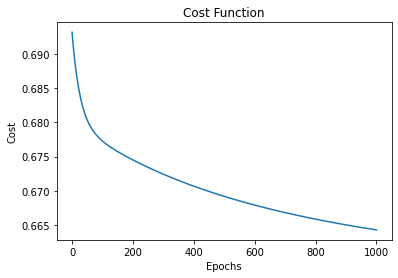

In [ ]:
plot_cost(regression_model[0])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# convert to binary
df['Predicted'] = df['Predicted'].apply(lambda x: 1 if x >= 0.5 else 0)

# count unique values
df['Predicted'].value_counts()

0    149
1      5
Name: Predicted, dtype: int64

In [ ]:
df.head()

,Actual,Predicted
661,1.0,0
122,0.0,0
113,0.0,0
14,1.0,0
529,0.0,0
